# Loading the libraries

In [173]:
import sklearn 
import matplotlib.pyplot as plt
import pandas as pd 

# Loading the datasets

In [91]:
data = pd.read_csv('Dataset1.txt')
data.head()

,x,y,CLASS
0,10.500000,9.000000,1
1,10.567170,9.268445,1
2,8.275320,11.382210,1
3,8.227458,11.377640,1
4,8.179511,11.372110,1


In [92]:
# from sklearn.preprocessing import StandardScaler
# data = StandardScaler().fit_transform(data)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   CLASS   2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [97]:
data2.describe()

,x,y,CLASS
count,4600.000000,4600.000000,4600.000000
mean,-0.057661,0.003313,0.100000
std,5.409135,5.321205,0.300033
min,-9.985110,-9.977840,0.000000
25%,-4.916597,-4.651813,0.000000
50%,-0.067696,-0.083615,0.000000
75%,4.814645,4.667083,0.000000
max,9.934000,9.979760,1.000000


In [101]:
data2 =  pd.read_csv('Dataset2.txt')

In [102]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4600 non-null   float64
 1   y       4600 non-null   float64
 2   CLASS   4600 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 107.9 KB


In [103]:
# data2 = StandardScaler().fit_transform(data2)

In [104]:
# data2.describe()

# Dataset1 plotting 

<Axes: xlabel='x', ylabel='y'>

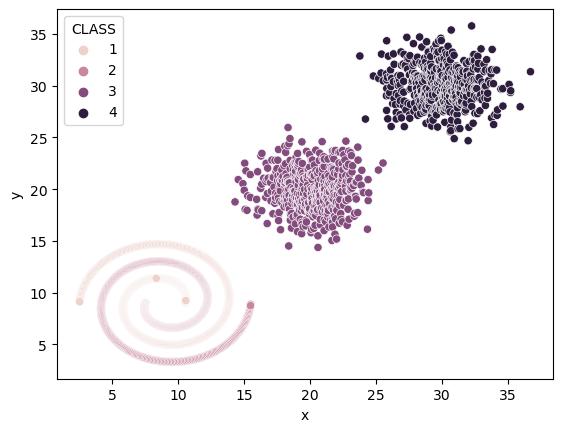

In [27]:
import seaborn as sns
sns.scatterplot(data= data, x= 'x', y= 'y', hue=data['CLASS'])

### As you can see, there are three possible clusters for the above dataset1.

# Dataset2 plotting 

<Axes: xlabel='x', ylabel='y'>

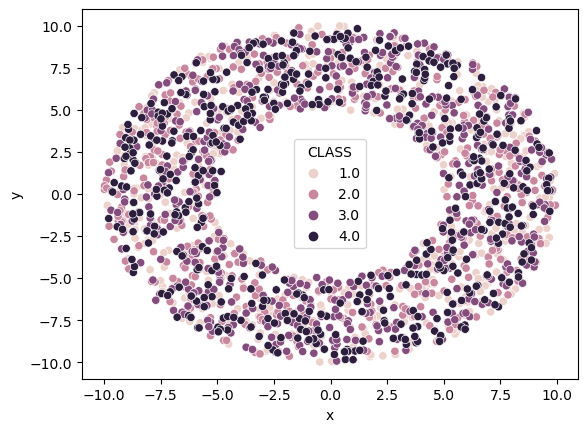

In [105]:
import seaborn as sns
sns.scatterplot(data= data2, x= 'x', y= 'y', hue=data['CLASS'])

### intuitively, it can't be seen any clean differences among datapoins of the above dataset, so NO suggestion can be made!

# b.

## Clustering through the KMeans

## Kmeans for dataset1

In [24]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

In [30]:
kmeans.fit(data)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [32]:
data['cluster'] = kmeans.labels_

## dataset1 after clustering 

<Axes: xlabel='x', ylabel='y'>

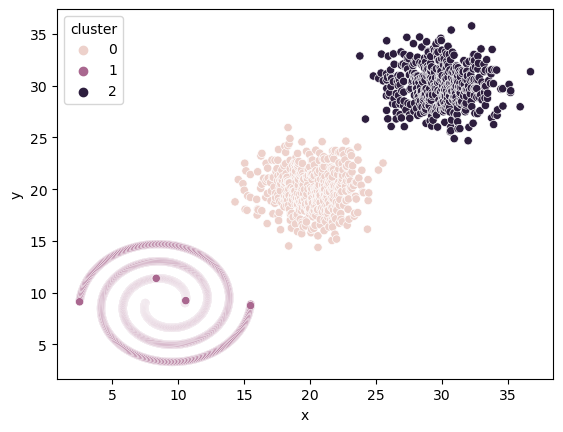

In [34]:
sns.scatterplot(data= data, x= 'x', y= 'y', hue=data['cluster'])

## Kmeans for dataset2 

In [59]:
kmeans2 = KMeans(n_clusters=4, random_state= 42, n_init= 'auto')
kmeans2.fit(data2)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [60]:
data2['cluster'] = kmeans2.labels_

## dataset2 after clustering 

<Axes: xlabel='x', ylabel='y'>

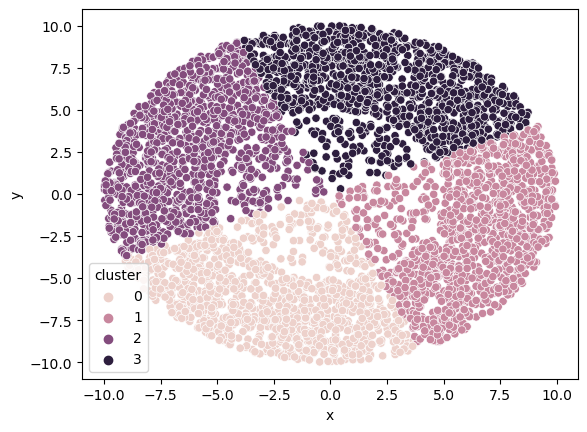

In [61]:
sns.scatterplot(data= data2, x= 'x', y= 'y', hue=data2['cluster'])

# c.

## clustering eveluation 

In [1]:
from sklearn.metrics import silhouette_score

In [65]:
labels1 = data['cluster']
silhouette_score1 = silhouette_score(data, labels1)
print(silhouette_score1)

0.6972698629951405


In [66]:
labels2 = data2['cluster']
silhouette_score2 = silhouette_score(data2, labels2)
print(silhouette_score2)

0.4227156774248591


## elbow method

### dataset 1

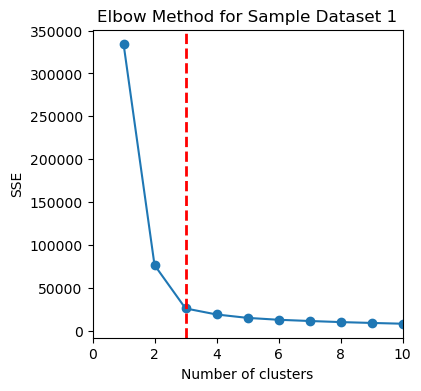

In [76]:
lis1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data)
    lis1.append(kmeans.inertia_)

plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), lis1, marker='o')
plt.title('Elbow Method for Sample Dataset 1')
plt.xlabel('Number of clusters')
plt.xlim(0, 10)
plt.ylabel('SSE')

plt.axvline(x=3, color='r', linestyle='--', linewidth=2)
plt.show()


### dataset2

### the vertical red line shows the best number of clusters

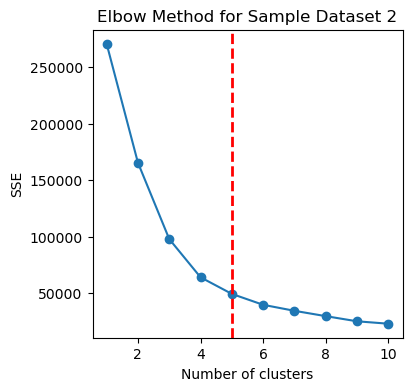

In [77]:
lis2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data2)
    lis2.append(kmeans.inertia_)

plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), lis2, marker='o')
plt.title('Elbow Method for Sample Dataset 2')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

plt.axvline(x=5, color='r', linestyle='--', linewidth=2)
plt.show()

## clustering the dataset2 after finding the best number of classes 

In [107]:
kmeans2 = KMeans(n_clusters=5, random_state= 42, n_init= 'auto')
kmeans2.fit(data2)
data2['cluster'] = kmeans2.labels_

labels2 = data2['cluster']
silhouette_score2 = silhouette_score(data2, labels2)
print(silhouette_score2)

0.4404888134517411


<Axes: xlabel='x', ylabel='y'>

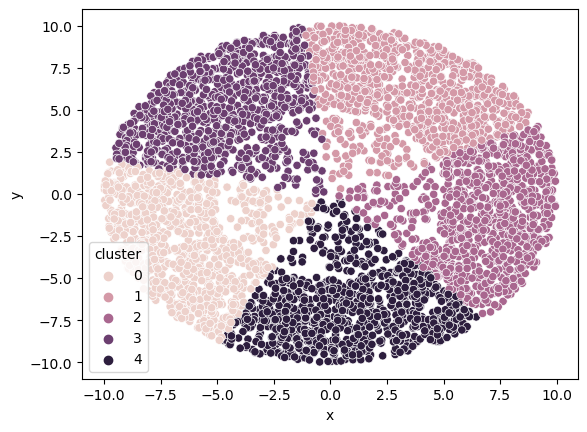

In [108]:
sns.scatterplot(data= data2, x= 'x', y= 'y', hue=data2['cluster'])

# d.

# DBSCAN clustering

In [124]:
def evaluate_dbscan(X, eps_values, min_samples_values):
    best_score = -1
    best_params = {}
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            if len(set(labels)) > 1:  
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
    return best_params, best_score, labels

In [113]:
import numpy as np
from sklearn.cluster import DBSCAN
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(2, 10)

In [130]:
best_params, best_score, labels1 = evaluate_dbscan(data, eps_values, min_samples_values)

In [131]:
print(best_params)
print(best_score)

{'eps': 1.4000000000000001, 'min_samples': 2}
0.3698406296462119


In [132]:
best_params, best_score, labels2 = evaluate_dbscan(data2, eps_values, min_samples_values)

In [133]:
print(best_params)
print(best_score)

{'eps': 1.1, 'min_samples': 2}
0.3091988003463327


# e.

# DBSCAN Evaluation 

In [135]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

## dataset1

In [136]:

silhouette_avg = silhouette_score(data, labels1)

db_index = davies_bouldin_score(data, labels1)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.36212596464702557
Davies-Bouldin Index: 2.6731234991594324


## dataset2

In [137]:

silhouette_avg = silhouette_score(data2, labels2)

db_index = davies_bouldin_score(data2, labels2)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.24304971911192094
Davies-Bouldin Index: 1.1294843258105451


# Outlier Detection by Kmeans

# Loading the dataset

In [138]:
my_data = pd.read_csv('Dataset3.txt')

In [146]:
dropped = my_data.columns[0]

In [147]:
my_data.drop(dropped, axis= 1, inplace= True)

In [149]:
my_data.head()

,x,y,CLASS
0,15.4640,19.4409,0
1,17.7983,14.8367,0
2,15.0522,17.2602,0
3,15.3265,18.1245,0
4,17.7211,15.0053,0


# Potting the dataset 

<Axes: xlabel='x', ylabel='y'>

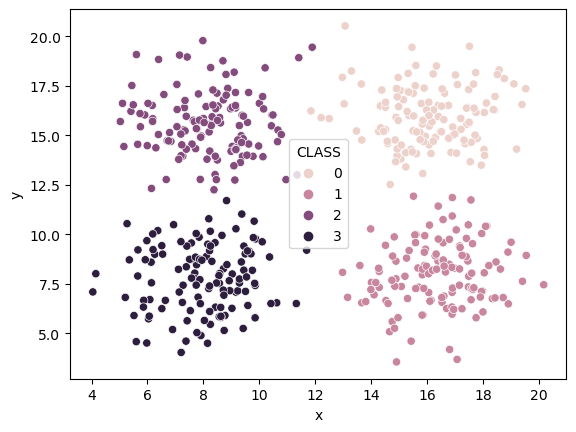

In [150]:
sns.scatterplot(data= my_data, x= 'x', y= 'y', hue=my_data['CLASS'])

## Preprocessing

In [151]:
from sklearn.preprocessing import StandardScaler
my_data = StandardScaler().fit_transform(my_data)

## kmeans clustering 

In [153]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init= 'auto').fit(my_data)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

### outlier thershold

In [172]:
distances = np.linalg.norm(my_data - kmeans.cluster_centers_[kmeans.labels_], axis=1)

threshold = np.percentile(distances, 90)  
outliers = distances > threshold
len(outliers)

500

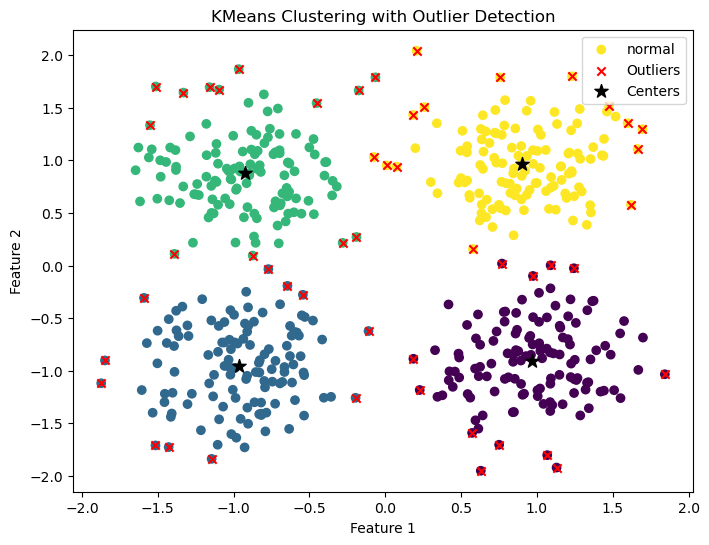

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(my_data[:, 0], my_data[:, 1], c=labels, cmap='viridis', marker='o', label='normal')
plt.scatter(my_data[outliers, 0], my_data[outliers, 1], color='red', marker='x', label='Outliers')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='*', s=100, label='Centers')
plt.legend()

plt.title('KMeans Clustering with Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()